<a href="https://colab.research.google.com/github/almedida/Predictive-Modeling-of-the-United-States-1992-Presidential-Election/blob/master/predictive_analysis_of_election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load Libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from numpy.ma.core import std
from ipywidgets import interact, interactive, fixed, interact_manual

from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import statsmodels as sm

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# **Data Preparation**

VARIABLE NAMES and DESCRIPTIONS

RESPONSE VARIABLE is CLINTON (Percent vote for Clinton in 1992 presidential election).

County level results for percent voting for Bill Clinton in 1992 Presidential Election and Demographic variables.
Variables (listed in the order they appear in the dataset)
* COUNTY: County Name
* CLINTON: Percent voting for Clinton in 1992
* AGE: Median Age
* SAVINGS: Mean Savings($)

* INCOME: PerCapita Income ($)
* POVERTY: Percent in Poverty
* VETERANS: Percent Veterans
* FEMALE: Percent Female
* POP_DENSITY: Population Density
* NURSING: Percent in Nursing Homes - this is a measure of the age of the population
* CRIME: Crime Index (Per capita)
* DEM: Previous Election Political Preference (0=Republican, 1=Democratic, 2=mixed)

In [ ]:
#read sas file
#df = pd.read_sas('exam2.sas7bdat', format = 'sas7bdat', encoding='latin-1')

#save a copy as csv file
# df.to_csv('election_data.csv', index=False)

In [ ]:
#read new data
data_df = pd.read_csv('election_data.csv', sep =',')

In [ ]:
data_df.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,"Owsley, KY",28.95,34.3,45723.0,9373.0,46.4,9.65,49.30,26.2,19.23,88.0,2.0
1,"Portage, OH",42.37,30.0,43414.0,16339.0,10.6,11.07,51.08,296.7,3.44,275.0,2.0
2,"Ouachita, AR",59.69,35.2,71745.0,14052.0,22.1,11.88,52.83,40.4,11.86,442.0,1.0
3,"St. Francois, MO",49.44,34.4,72654.0,13147.0,19.6,11.40,49.88,111.5,13.01,184.0,0.0
4,"Carroll, GA",37.21,30.4,62832.0,14798.0,16.0,7.53,51.52,148.0,7.17,461.0,2.0


In [ ]:
#get the diminesion of the data
data_df.shape

(949, 12)

In [ ]:
#checking the data types of the variables
data_df.dtypes

county          object
CLINTON        float64
Age            float64
Savings        float64
Income         float64
Poverty        float64
Veterans       float64
Female         float64
Pop_Density    float64
Nursing        float64
Crime          float64
dem            float64
dtype: object

In [ ]:
data_df['dem'] = data_df['dem'].astype('int')

In [ ]:
data_df.dtypes

county          object
CLINTON        float64
Age            float64
Savings        float64
Income         float64
Poverty        float64
Veterans       float64
Female         float64
Pop_Density    float64
Nursing        float64
Crime          float64
dem              int64
dtype: object

In [ ]:
data_df.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,"Owsley, KY",28.95,34.3,45723.0,9373.0,46.4,9.65,49.30,26.2,19.23,88.0,2
1,"Portage, OH",42.37,30.0,43414.0,16339.0,10.6,11.07,51.08,296.7,3.44,275.0,2
2,"Ouachita, AR",59.69,35.2,71745.0,14052.0,22.1,11.88,52.83,40.4,11.86,442.0,1
3,"St. Francois, MO",49.44,34.4,72654.0,13147.0,19.6,11.40,49.88,111.5,13.01,184.0,0
4,"Carroll, GA",37.21,30.4,62832.0,14798.0,16.0,7.53,51.52,148.0,7.17,461.0,2


In [ ]:
#summary of the data to get an insight on the dataflow
data_df.describe()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,40.165479,34.581981,91417.983140,16385.510011,16.362487,11.313815,51.088757,233.692413,9.608925,311.654373,1.512118
std,10.337133,3.632850,43028.502645,3295.011109,6.957856,2.193634,1.383086,1326.295243,6.826414,236.974385,0.808128
min,12.940000,23.400000,14062.000000,6118.000000,3.500000,2.780000,41.580000,0.400000,0.080000,0.000000,0.000000
25%,33.130000,32.600000,63422.000000,14247.000000,11.700000,9.850000,50.500000,19.600000,5.100000,149.000000,1.000000
50%,39.400000,34.300000,83262.000000,15905.000000,15.000000,11.430000,51.190000,44.400000,7.700000,261.000000,2.000000
75%,46.460000,36.500000,109640.000000,17899.000000,19.700000,12.910000,51.870000,112.100000,11.950000,423.000000,2.000000
max,84.640000,55.400000,387847.000000,35536.000000,52.000000,18.260000,54.550000,32360.300000,59.220000,2792.000000,2.000000


In [ ]:
#inspecting if there are missing values
missing_data = data_df.isnull()
missing_data.head(5)

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

county
False    949
Name: county, dtype: int64

CLINTON
False    949
Name: CLINTON, dtype: int64

Age
False    949
Name: Age, dtype: int64

Savings
False    949
Name: Savings, dtype: int64

Income
False    949
Name: Income, dtype: int64

Poverty
False    949
Name: Poverty, dtype: int64

Veterans
False    949
Name: Veterans, dtype: int64

Female
False    949
Name: Female, dtype: int64

Pop_Density
False    949
Name: Pop_Density, dtype: int64

Nursing
False    949
Name: Nursing, dtype: int64

Crime
False    949
Name: Crime, dtype: int64

dem
False    949
Name: dem, dtype: int64



**Observation: No missing values**

In [ ]:
#Standardizing the data
data_df_norm = (data_df.iloc[:, 1:11] - data_df.iloc[:, 1:11].mean())/(data_df.iloc[:, 1:11].std())

In [ ]:
data_df_norm.head()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime
0,-1.084970,-0.077620,-1.061970,-2.128220,4.317065,-0.758474,-1.293308,-0.156445,1.409389,-0.943791
1,0.213262,-1.261264,-1.115632,-0.014115,-0.828199,-0.111146,-0.006331,0.047506,-0.903685,-0.154677
2,1.888775,0.170120,-0.457208,-0.708195,0.824609,0.258104,1.258955,-0.145739,0.329760,0.550041
3,0.897204,-0.050093,-0.436083,-0.982853,0.465303,0.039289,-0.873956,-0.092131,0.498223,-0.538684
4,-0.285909,-1.151157,-0.664350,-0.481792,-0.052097,-1.724907,0.311798,-0.064610,-0.357278,0.630218


In [ ]:
#copy data to a new dataframe
new_df = data_df.copy()

Update new dataframe with the standardized columns

In [ ]:
new_df.update(data_df_norm)

In [ ]:
new_df.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,"Owsley, KY",-1.084970,-0.077620,-1.061970,-2.128220,4.317065,-0.758474,-1.293308,-0.156445,1.409389,-0.943791,2
1,"Portage, OH",0.213262,-1.261264,-1.115632,-0.014115,-0.828199,-0.111146,-0.006331,0.047506,-0.903685,-0.154677,2
2,"Ouachita, AR",1.888775,0.170120,-0.457208,-0.708195,0.824609,0.258104,1.258955,-0.145739,0.329760,0.550041,1
3,"St. Francois, MO",0.897204,-0.050093,-0.436083,-0.982853,0.465303,0.039289,-0.873956,-0.092131,0.498223,-0.538684,0
4,"Carroll, GA",-0.285909,-1.151157,-0.664350,-0.481792,-0.052097,-1.724907,0.311798,-0.064610,-0.357278,0.630218,2


negative values simply represent the values of respective counties below the mean of all the counties

In [ ]:
new_df.to_csv('ready_election_data.csv', index=False)

##**Exploratory Data Analysis**##

In [ ]:
df_ready = pd.read_csv('ready_election_data.csv', sep=",")

In [ ]:
df_ready.head()

,county,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,"Owsley, KY",-1.084970,-0.077620,-1.061970,-2.128220,4.317065,-0.758474,-1.293308,-0.156445,1.409389,-0.943791,2
1,"Portage, OH",0.213262,-1.261264,-1.115632,-0.014115,-0.828199,-0.111146,-0.006331,0.047506,-0.903685,-0.154677,2
2,"Ouachita, AR",1.888775,0.170120,-0.457208,-0.708195,0.824609,0.258104,1.258955,-0.145739,0.329760,0.550041,1
3,"St. Francois, MO",0.897204,-0.050093,-0.436083,-0.982853,0.465303,0.039289,-0.873956,-0.092131,0.498223,-0.538684,0
4,"Carroll, GA",-0.285909,-1.151157,-0.664350,-0.481792,-0.052097,-1.724907,0.311798,-0.064610,-0.357278,0.630218,2


**Observations**
* we seem to be good here, there is no strong linear correlation between the predictors.
* poverty appears to be more correlation with the response variable (CLINTON) than other predictors. We will keep an eye on it as the analysis moves further.

In [ ]:
df_ready = df_ready._get_numeric_data()
df_ready.head()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,-1.084970,-0.077620,-1.061970,-2.128220,4.317065,-0.758474,-1.293308,-0.156445,1.409389,-0.943791,2
1,0.213262,-1.261264,-1.115632,-0.014115,-0.828199,-0.111146,-0.006331,0.047506,-0.903685,-0.154677,2
2,1.888775,0.170120,-0.457208,-0.708195,0.824609,0.258104,1.258955,-0.145739,0.329760,0.550041,1
3,0.897204,-0.050093,-0.436083,-0.982853,0.465303,0.039289,-0.873956,-0.092131,0.498223,-0.538684,0
4,-0.285909,-1.151157,-0.664350,-0.481792,-0.052097,-1.724907,0.311798,-0.064610,-0.357278,0.630218,2


**Distribution of the demographics' political preferences that voted for Bill Clinton**

In [ ]:
political_grp = ['Republican', 'Democratic', 'Mixed']

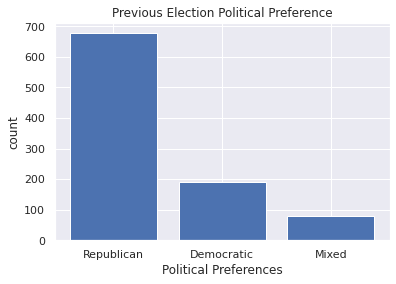

In [ ]:
#visualizing previous election preferences
plt.bar(political_grp, df_ready["dem"].value_counts())

# set x/y labels and plot title
x = plt.xlabel("Political Preferences")
y= plt.ylabel("count")
title = plt.title("Previous Election Political Preference")

**Observation**
* More counties with Republican as political preference voted more for Bill Clinton, followed by Democratic



#**Data Diagnostics**#

**A histogram for each numnerical attribute and scatterplot of the relationships between the variables**

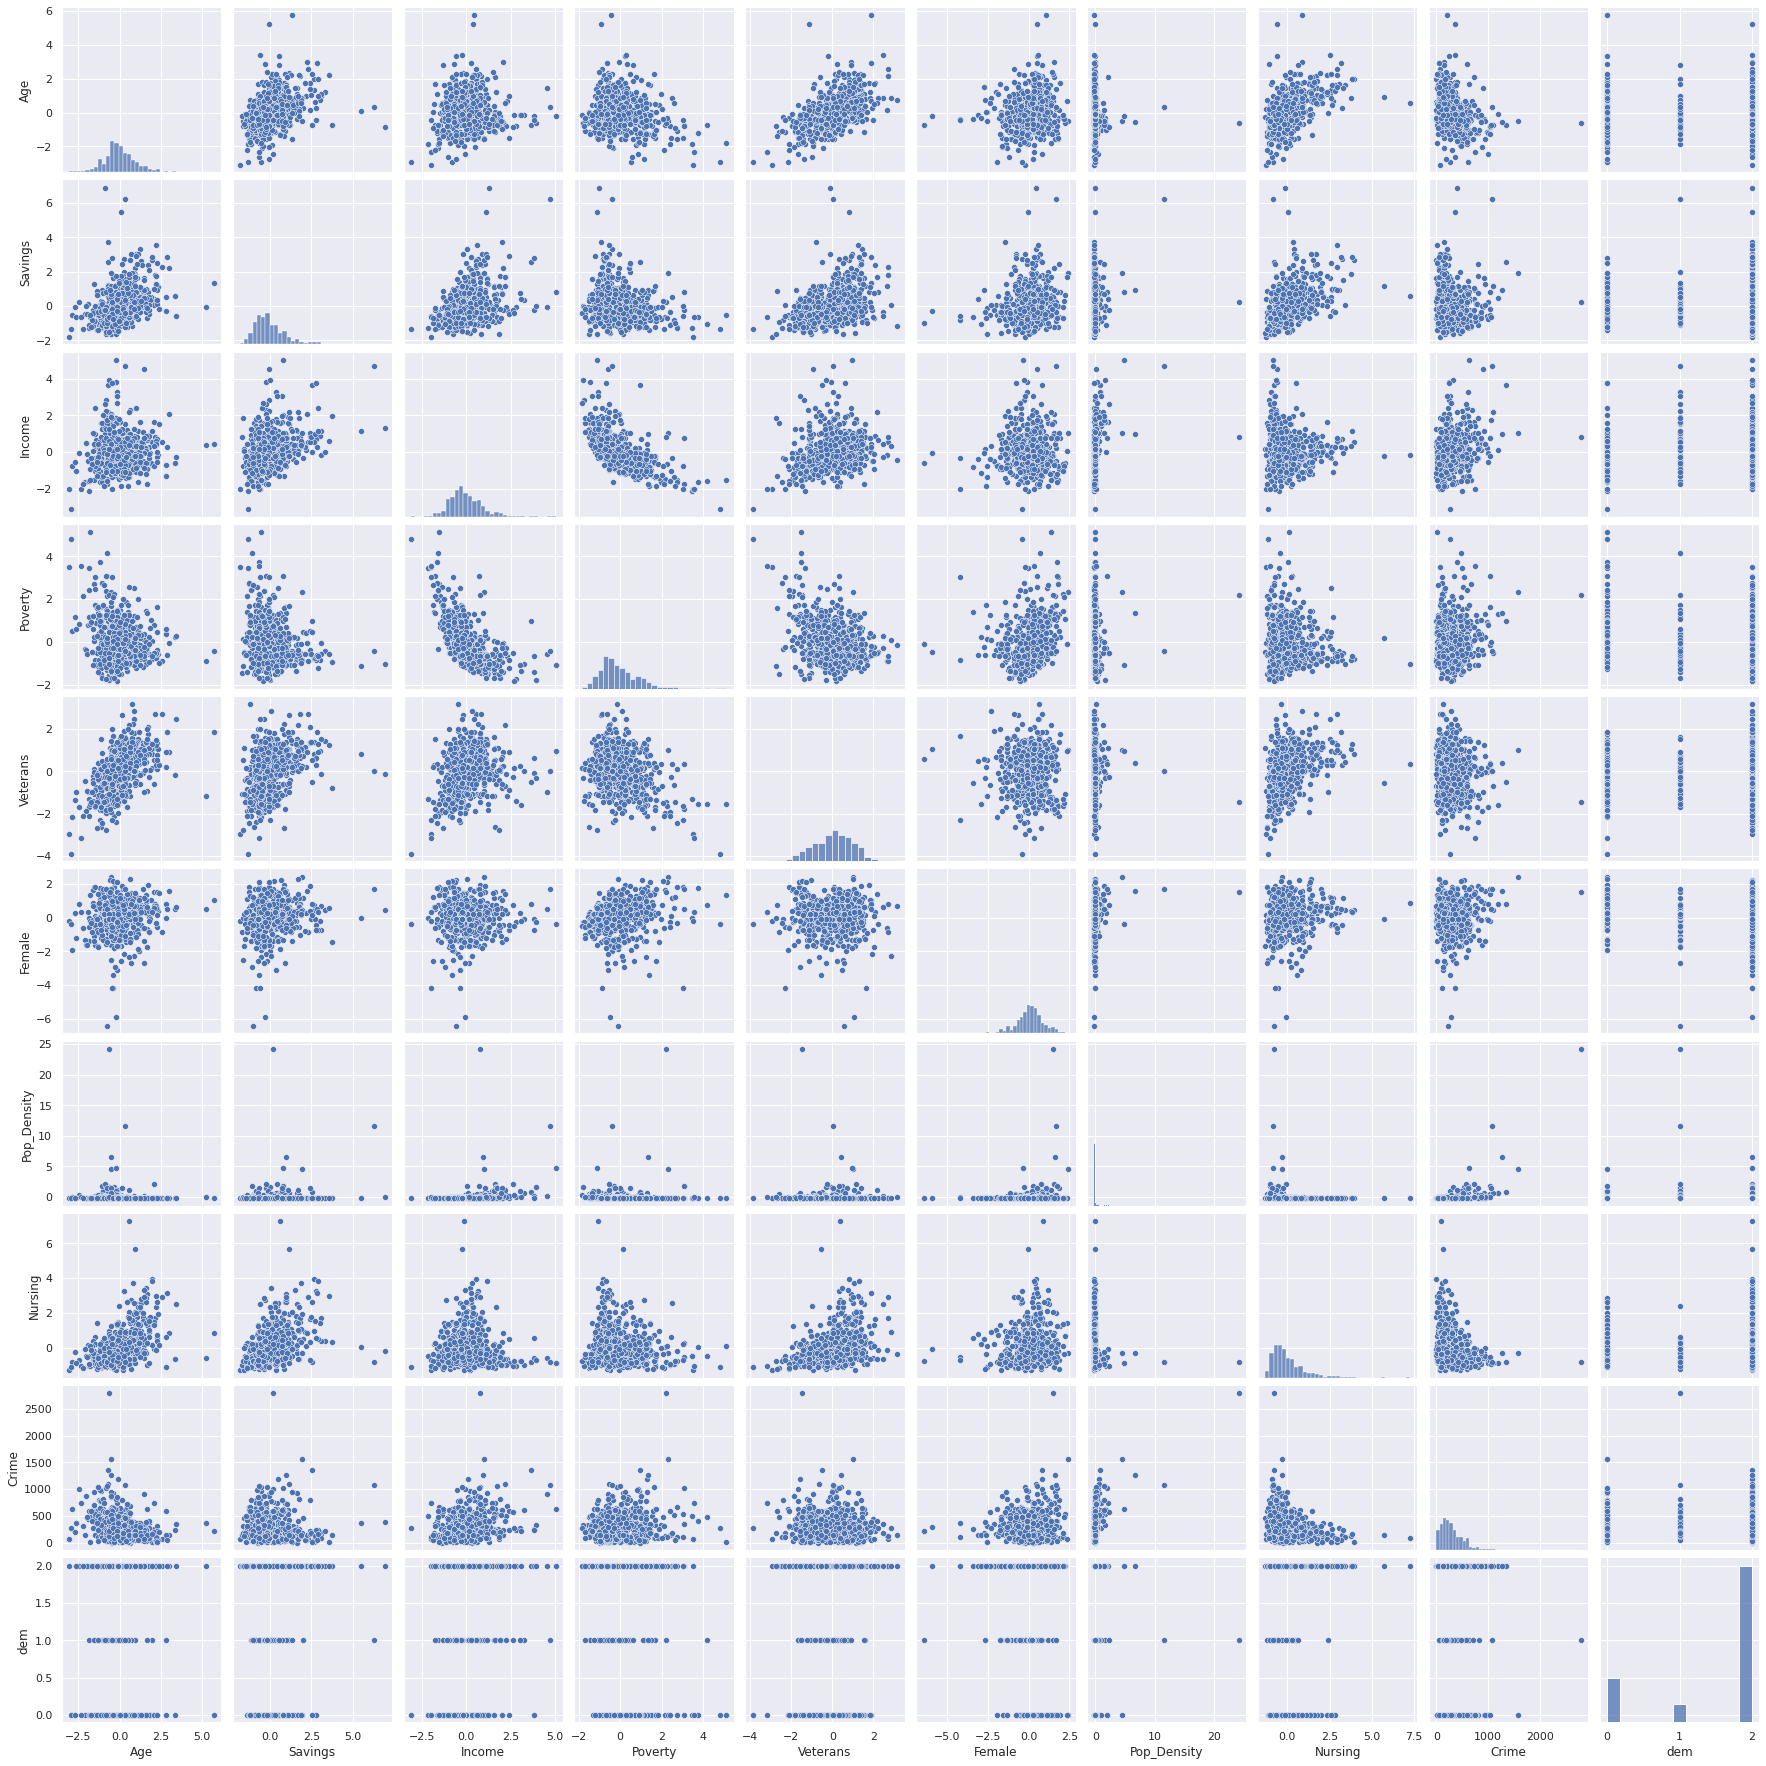

In [ ]:
sns.set()
cols = ['CLINTON','Age', 'Savings', 'Income', 'Poverty', 'Veterans', 'Female', 'Pop_Density', 'Nursing', 'Crime', 'dem']

sns.pairplot(df_ready[cols], height = 2.5)
plt.show()

###**Measure the interdependence between variables**###

There appears to be no linear relationship between the percent vote for CLINTON and the demographic variables. But Poverty shows a little linear relationship

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>


In [ ]:
df_ready.corr()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
CLINTON,1.000000,-0.124836,-0.161863,-0.227478,0.516721,-0.141365,0.285916,0.226710,-0.141358,0.189428,-0.101136
Age,-0.124836,1.000000,0.383360,0.118854,-0.209850,0.534263,0.186219,-0.055444,0.506887,-0.284167,0.096566
Savings,-0.161863,0.383360,1.000000,0.416097,-0.215529,0.380148,0.185705,0.142846,0.438689,-0.056960,0.094452
Income,-0.227478,0.118854,0.416097,1.000000,-0.603587,0.256094,0.055786,0.276897,-0.009514,0.268777,0.077653
Poverty,0.516721,-0.209850,-0.215529,-0.603587,1.000000,-0.351902,0.225260,0.041484,-0.092556,0.125258,-0.247591
Veterans,-0.141365,0.534263,0.380148,0.256094,-0.351902,1.000000,0.036553,-0.012048,0.368658,-0.105081,0.119565
Female,0.285916,0.186219,0.185705,0.055786,0.225260,0.036553,1.000000,0.140458,0.114390,0.128715,-0.108264
Pop_Density,0.226710,-0.055444,0.142846,0.276897,0.041484,-0.012048,0.140458,1.000000,-0.105346,0.507995,-0.022493
Nursing,-0.141358,0.506887,0.438689,-0.009514,-0.092556,0.368658,0.114390,-0.105346,1.000000,-0.335405,0.082754
Crime,0.189428,-0.284167,-0.056960,0.268777,0.125258,-0.105081,0.128715,0.507995,-0.335405,1.000000,-0.119886


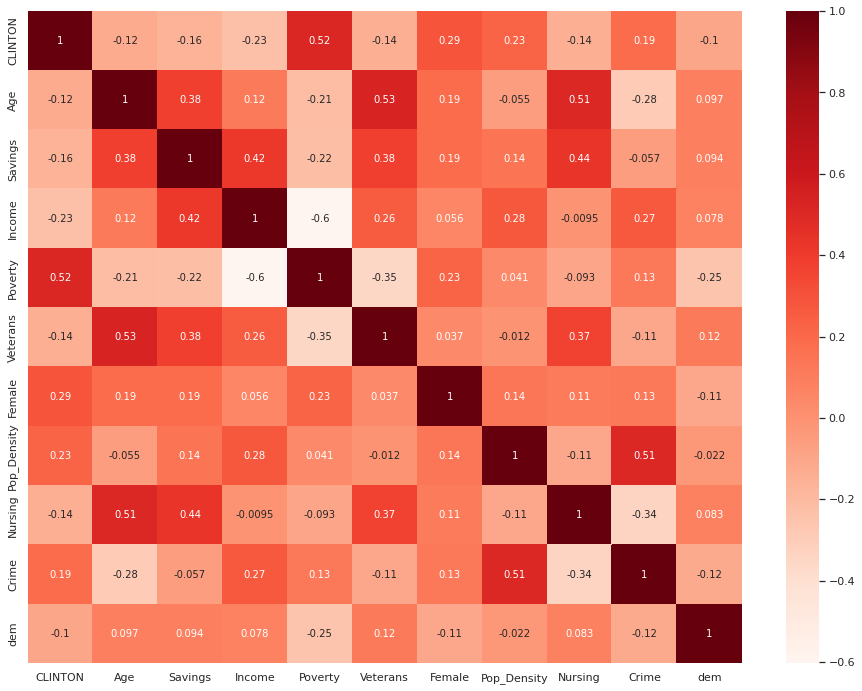

In [ ]:
%matplotlib inline
plt.figure(figsize=(16,12))
cor = df_ready[cols].corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
corr_CLINTON = cor['CLINTON'].sort_values(ascending = False)
print(corr_CLINTON)

CLINTON        1.000000
Poverty        0.516721
Female         0.285916
Pop_Density    0.226710
Crime          0.189428
dem           -0.101136
Age           -0.124836
Nursing       -0.141358
Veterans      -0.141365
Savings       -0.161863
Income        -0.227478
Name: CLINTON, dtype: float64


###**Checking Outliers**###

In [ ]:
Q1 = df_ready.quantile(0.25)
Q3 = df_ready.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

CLINTON        1.289526
Age            1.073537
Savings        1.074125
Income         1.108342
Poverty        1.149780
Veterans       1.394946
Female         0.990539
Pop_Density    0.069743
Nursing        1.003455
Crime          1.156243
dem            1.000000
dtype: float64


* True - indicates the presence of outliers
* False -  No outliers 

In [ ]:
df_ready_out = ((df_ready < (Q1 - 1.5 * IQR)) | (df_ready > (Q3 + 1.5 * IQR)))
print(df_ready_out)

     CLINTON    Age  Savings  Income  ...  Pop_Density  Nursing  Crime    dem
0      False  False    False   False  ...        False    False  False  False
1      False  False    False   False  ...         True    False  False  False
2      False  False    False   False  ...        False    False  False  False
3      False  False    False   False  ...        False    False  False  False
4      False  False    False   False  ...        False    False  False  False
..       ...    ...      ...     ...  ...          ...      ...    ...    ...
944    False  False    False   False  ...        False    False  False  False
945    False  False    False   False  ...         True    False  False  False
946    False  False    False   False  ...        False    False  False  False
947    False  False    False   False  ...        False    False  False  False
948    False  False    False   False  ...        False     True  False  False

[949 rows x 11 columns]


we randomly split our data into training and testing data using the function train_test_split.

In [ ]:
y_data = df_ready['CLINTON']
x_data = df_ready.drop('CLINTON', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 314
number of training samples: 635


###**Checking Normality of the target variable, CLINTON**###

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


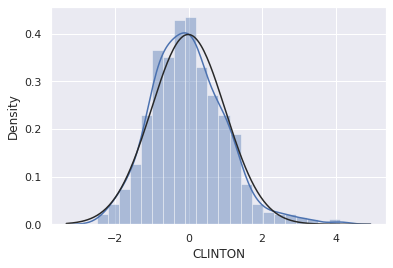

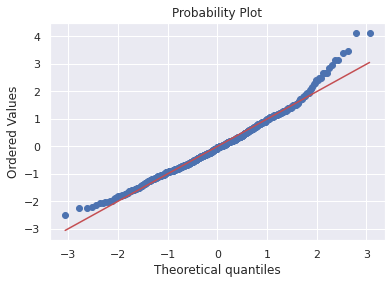

In [ ]:
from scipy import stats
from scipy.stats import norm

sns.distplot(y_train, fit = norm)
fig = plt.figure()
res = stats.probplot(y_train, plot = plt)

#Model Development#

In [ ]:
df_ready = pd.read_csv('ready_election_data.csv', sep=",")

In [ ]:
df_ready = df_ready._get_numeric_data()
df_ready.head()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem
0,-1.084970,-0.077620,-1.061970,-2.128220,4.317065,-0.758474,-1.293308,-0.156445,1.409389,88.0,2
1,0.213262,-1.261264,-1.115632,-0.014115,-0.828199,-0.111146,-0.006331,0.047506,-0.903685,275.0,2
2,1.888775,0.170120,-0.457208,-0.708195,0.824609,0.258104,1.258955,-0.145739,0.329760,442.0,1
3,0.897204,-0.050093,-0.436083,-0.982853,0.465303,0.039289,-0.873956,-0.092131,0.498223,184.0,0
4,-0.285909,-1.151157,-0.664350,-0.481792,-0.052097,-1.724907,0.311798,-0.064610,-0.357278,461.0,2


##**Feature development**##

In [ ]:
age = df_ready['Age']
savings = df_ready['Savings']
income = df_ready['Income']
poverty = df_ready['Poverty']
veterans = df_ready['Veterans']
female = df_ready['Female']
pop_density = df_ready['Pop_Density']
nursing = df_ready['Nursing']
crime = df_ready['Crime']
dem = df_ready['dem']

In [ ]:
age_sq = age**2
savings_sq = savings**2	
income_sq = income**2	
poverty_sq = poverty**2	
female_sq = female**2	
pop_density_sq = pop_density**2	
nursing_sq = nursing**2	
crime_sq = crime**2	
veterans_sq = veterans**2;
dem_sq = dem**2

In [ ]:
df1 = [age_sq, savings_sq, income_sq, poverty_sq, veterans_sq, female_sq, pop_density_sq, nursing_sq, crime_sq, dem_sq]
df1 = pd.DataFrame(df1)
df1 = df1.transpose()

df1_header = ['age_sq', 'savings_sq', 'income_sq', 'poverty_sq', 'veterans_sq', 'female_sq', 'pop_density_sq', 'nursing_sq', 'crime_sq', 'dem_sq']

df1.columns = df1_header
df1.head()

#df1.to_csv("df1.csv", header = None)

,age_sq,savings_sq,income_sq,poverty_sq,veterans_sq,female_sq,pop_density_sq,nursing_sq,crime_sq,dem_sq
0,0.006025,1.127780,4.529322,18.637048,0.575283,1.672646,0.024475,1.986378,7744.0,4.0
1,1.590786,1.244635,0.000199,0.685913,0.012354,0.000040,0.002257,0.816646,75625.0,4.0
2,0.028941,0.209039,0.501540,0.679981,0.066618,1.584969,0.021240,0.108741,195364.0,1.0
3,0.002509,0.190168,0.965999,0.216507,0.001544,0.763800,0.008488,0.248226,33856.0,0.0
4,1.325163,0.441361,0.232124,0.002714,2.975304,0.097218,0.004174,0.127647,212521.0,4.0


In [ ]:
interVA = veterans*age	
interVS = veterans*savings
interVI = veterans*income
interVP = veterans*poverty
interVF = veterans*female	
InterVPD = veterans*pop_density
interVN = veterans*nursing
interVC = veterans*crime
interVD = veterans*dem	

In [ ]:
df2 = [interVA, interVS, interVI, interVP, interVF, InterVPD, interVN, interVC, interVD]
df2 = pd.DataFrame(df2)
df2 = df2.transpose()

df2_header = ['interVA', 'interVS', 'interVI', 'interVP', 'interVF', 'InterVPD', 'interVN', 'interVC', 'interVD']

df2.columns = df2_header

df2.head()

,interVA,interVS,interVI,interVP,interVF,InterVPD,interVN,interVC,interVD
0,0.058873,0.805477,1.614200,-3.274382,0.980941,0.118660,-1.068985,-66.745718,-1.516948
1,0.140185,0.123999,0.001569,0.092051,0.000704,-0.005280,0.100441,-30.565262,-0.222293
2,0.043909,-0.118007,-0.182788,0.212835,0.324941,-0.037616,0.085112,114.081914,0.258104
3,-0.001968,-0.017133,-0.038615,0.018281,-0.034337,-0.003620,0.019575,7.229157,0.000000
4,1.985639,1.145942,0.831046,0.089863,-0.537823,0.111447,0.616271,-795.182086,-3.449814


In [ ]:
interAS = age*savings	
interAI = age*income	
interAP = age*poverty
interAF = age*female		
interAPD = age*pop_density	
interAN = age*nursing	
interAC = age*crime
interAD = age*dem

In [ ]:
df3 = [interAS, interAI, interAP, interAF, interAPD, interAN, interAC, interAD]
df3 = pd.DataFrame(df3)
df3 = df3.transpose()

df3_header = ['interAS', 'interAI', 'interAP', 'interAF', 'interAPD', 'interAN', 'interAC', 'interAD']

df3.columns =df3_header

df3.head()

,interAS,interAI,interAP,interAF,interAPD,interAN,interAC,interAD
0,0.082430,0.165192,-0.335090,0.100386,0.012143,-0.109397,-6.830542,-0.155240
1,1.407106,0.017803,1.044577,0.007985,-0.059918,1.139785,-346.847486,-2.522527
2,-0.077780,-0.120478,0.140282,0.214173,-0.024793,0.056099,75.192867,0.170120
3,0.021845,0.049234,-0.023309,0.043779,0.004615,-0.024958,-9.217147,-0.000000
4,0.764771,0.554618,0.059972,-0.358928,0.074377,0.411283,-530.683463,-2.302314


In [ ]:
interSI = savings*income	
interSP = savings*poverty
interSF = savings*female	
interSPD = savings*pop_density
interSN = savings*nursing
interSC = savings*crime
interSD = savings*dem

In [ ]:
df4 = [interSI, interSP, interSF, interSPD, interSN, interSC, interSD]
df4 = pd.DataFrame(df4)
df4 = df4.transpose()

df4_header = ['interSI', 'interSP', 'interSF', 'interSPD', 'interSN', 'interSC', 'interSD']

df4.columns =df4_header
df4.head()

,interSI,interSP,interSF,interSPD,interSN,interSC,interSD
0,2.260106,-4.584594,1.373455,0.166140,-1.496729,-93.453369,-2.123940
1,0.015747,0.923965,0.007063,-0.053000,1.008180,-306.798855,-2.231264
2,0.323792,-0.377018,-0.575605,0.066633,-0.150769,-202.086013,-0.457208
3,0.428605,-0.202911,0.381117,0.040177,-0.217266,-80.239206,-0.000000
4,0.320078,0.034611,-0.207143,0.042924,0.237357,-306.265322,-1.328700


In [ ]:
interIP = income*poverty	
interIF = income*female
interIPD = income*pop_density
interIN = income*nursing		
interIC = income*crime		
interID = income*dem

In [ ]:
df5 = [interIP, interIF, interIPD, interIN, interIC, interID]
df5 = pd.DataFrame(df5)
df5 = df5.transpose()

df5_header = ['interIP', 'interIF', 'interIPD', 'interIN', 'interIC', 'interID']

df5.columns =df5_header
df5.head()

,interIP,interIF,interIPD,interIN,interIC,interID
0,-9.187665,2.752445,0.332950,-2.999491,-187.283399,-4.256441
1,0.011690,0.000089,-0.000671,0.012756,-3.881703,-0.028231
2,-0.583984,-0.891586,0.103211,-0.233534,-313.022139,-0.708195
3,-0.457325,0.858970,0.090551,-0.489680,-180.844866,-0.000000
4,0.025100,-0.150222,0.031129,0.172134,-222.106115,-0.963584


In [ ]:
interPF = poverty*female	
interPPD = poverty*pop_density	
interPN = poverty*nursing
interPC = poverty*crime
interPD = poverty*dem

In [ ]:
df6 = [interPF, interPPD, interPN, interPC, interPD]
df6 = pd.DataFrame(df6)
df6 = df6.transpose()

df6_header = ['interPF', 'interPPD', 'interPN', 'interPC', 'interPD']

df6.columns =df6_header
df6.head()

,interPF,interPPD,interPN,interPC,interPD
0,-5.583296,-0.675384,6.084425,379.901693,8.634129
1,0.005243,-0.039345,0.748430,-227.754634,-1.656397
2,1.038146,-0.120177,0.271923,364.477353,0.824609
3,-0.406655,-0.042869,0.231825,85.615806,0.000000
4,-0.016244,0.003366,0.018613,-24.016944,-0.104195


In [ ]:
interFPD = female*pop_density
interFN = female*nursing	
interFC = female*crime
interFD = female*dem

In [ ]:
df7 = [interFPD, interFN, interFC, interFD]
df7 = pd.DataFrame(df7)
df7 = df7.transpose()

df7_header = ['interFPD', 'interFN', 'interFC', 'interFD']

df7.columns =df7_header
df7.head()

,interFPD,interFN,interFC,interFD
0,0.202332,-1.822775,-113.811134,-2.586617
1,-0.000301,0.005721,-1.741078,-0.012662
2,-0.183478,0.415152,556.458255,1.258955
3,0.080518,-0.435425,-160.807948,-0.000000
4,-0.020145,-0.111398,143.738873,0.623596


In [ ]:
interPDN = pop_density*nursing	
interPDC = pop_density*crime	
interPDD = pop_density*dem

In [ ]:
df8 = [interPDN, interPDC, interPDD]
df8 = pd.DataFrame(df8)
df8 = df8.transpose()

df8_header = ['interPDN', 'interPDC', 'interPDD']

df8.columns =df8_header
df8.head()

,interPDN,interPDC,interPDD
0,-0.220492,-13.767170,-0.312890
1,-0.042931,13.064275,0.095013
2,-0.048059,-64.416462,-0.145739
3,-0.045902,-16.952035,-0.000000
4,0.023084,-29.785376,-0.129221


In [ ]:
interNC = nursing*crime
interND = nursing*dem

In [ ]:
df9 = [interNC, interND]
df9 = pd.DataFrame(df9)
df9 = df9.transpose()

df9_header = ['interNC', 'interND']

df9.columns =df9_header
df9.head()

,interNC,interND
0,124.026264,2.818779
1,-248.513277,-1.807369
2,145.753703,0.329760
3,91.672992,0.000000
4,-164.705007,-0.714555


In [ ]:
interCD = crime*dem

In [ ]:
df10 = [interCD]
df10 = pd.DataFrame(df10)
df10 = df10.transpose()

df10_header = ['interCD']

df10.columns =df10_header
df10.head()

,interCD
0,176.0
1,550.0
2,442.0
3,0.0
4,922.0


In [ ]:
model_data = pd.concat([df_ready, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], axis=1)

In [ ]:
model_data.shape
# model_data.head()

(949, 66)

In [ ]:
model_data.describe()

,CLINTON,Age,Savings,Income,Poverty,Veterans,Female,Pop_Density,Nursing,Crime,dem,age_sq,savings_sq,income_sq,poverty_sq,veterans_sq,female_sq,pop_density_sq,nursing_sq,crime_sq,dem_sq,interVA,interVS,interVI,interVP,interVF,InterVPD,interVN,interVC,interVD,interAS,interAI,interAP,interAF,interAPD,interAN,interAC,interAD,interSI,interSP,interSF,interSPD,interSN,interSC,interSD,interIP,interIF,interIPD,interIN,interIC,interID,interPF,interPPD,interPN,interPC,interPD,interFPD,interFN,interFC,interFD,interPDN,interPDC,interPDD,interNC,interND,interCD
count,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,9.490000e+02,949.000000,949.000000,949.000000,9.490000e+02,9.490000e+02,949.000000,949.000000,9.490000e+02,9.490000e+02,949.000000,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,-5.017997e-15,1.353536e-14,-2.807729e-18,-4.111057e-18,-8.165813e-17,6.133719e-15,-1.348949e-14,2.521984e-16,2.098778e-15,311.654373,1.512118,0.998946,9.989463e-01,9.989463e-01,0.998946,0.998946,9.989463e-01,9.989463e-01,0.998946,1.532261e+05,2.938883,0.533700,0.379748,0.255824,-0.351531,0.036515,-0.012035,0.368270,-24.875226,0.096522,0.382956,0.118729,-0.209629,0.186023,-0.055385,0.506353,-67.269328,0.077955,0.415659,-0.215302,0.185510,0.142696,0.438227,-13.483841,0.076249,-0.602951,0.055727,0.276605,-0.009504,63.626124,0.062687,0.225023,0.041441,-0.092458,29.651590,-0.199874,0.140310,0.114269,30.470128,-0.087399,-0.105235,120.255059,-0.018158,-79.398723,0.066805,448.323498
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,236.974385,0.808128,2.243708,2.922135e+00,2.545976e+00,2.127209,1.443428,2.969766e+00,1.968209e+01,2.971269,3.323706e+05,1.692767,1.243897,0.992108,1.045831,1.354609,1.237368,1.198999,0.955885,391.593987,1.738440,1.061090,1.059015,1.165989,1.219997,0.590576,1.297876,386.727565,1.653376,1.599508,0.967836,1.099640,2.490362,1.260151,472.390322,1.758995,1.343403,1.063768,2.304484,0.812446,503.058561,1.636801,1.143461,1.826080,0.885716,442.859111,1.603707,1.524049,0.920609,446.484013,1.731786,0.774734,2287.873727,1.217113,280.684674,1.791002,446.137852
min,-2.633755e+00,-3.078019e+00,-1.797785e+00,-3.116078e+00,-1.848628e+00,-3.890264e+00,-6.875029e+00,-1.758978e-01,-1.395890e+00,0.000000,0.000000,0.000025,1.217996e-07,2.211361e-08,0.000029,0.000003,8.082268e-07,1.378411e-07,0.000002,0.000000e+00,0.000000,-8.374859,-3.686551,-5.081762,-18.751433,-6.918659,-35.377557,-3.229514,-4077.731277,-6.057359,-6.034130,-3.732443,-14.172936,-4.806506,-15.215606,-3.112693,-2489.741018,-6.156038,-2.973687,-7.091742,-5.317208,-1.967069,-5.226227,-1089.869306,-3.595569,-15.019784,-3.362063,-0.650750,-4.409064,-1476.903800,-4.256441,-12.720378,-5.316983,-7.690156,-866.258553,-3.697256,-1.706139,-6.586891,-3355.014373,-13.750059,-19.441395,-150.433948,-0.351796,-2240.877846,-2.791781,0.000000
25%,-6.806026e-01,-5.455720e-01,-6.506381e-01,-6.490145e-01,-6.701040e-01,-6.673012e-01,-4.256833e-01,-1.614214e-01,-6.605116e-01,149.000000,1.000000,0.063857,7.973314e-02,6.931308e-02,0.096595,0.100721,5.311534e-02,1.390436e-02,0.091160,2.220100e+04,1.000000,-0.019356,-0.078844,-0.117089,-0.567380,-0.233148,-0.095340,-0.096259,-143.867105,-0.678157,-0.047230,-0.216984,-0.393526,-0.118748,-0.096898,-0.026695,-172.208265,-0.650718,-0.079911,-0.449588,-0.145137,-0.057892,-0.029109,-182.473104,-0.892524,-0.713660,-0.255615,-0.016480,-0.232862,-131.948069,-0.772993,-0.139425,-0.0957

In [ ]:
model_data['dem_sq'] = model_data['dem_sq'].astype('int')

##Variables for feature selection##

In [ ]:
# age, savings, income, poverty, veterans, female, pop_density, nursing, crime, dem
# age_sq, savings_sq, income_sq, poverty_sq, veterans_sq, female_sq, pop_density_sq, nursing_sq, crime_sq, dem_sq
# interVA, interVS, interVI, interVP, interVF, InterVPD, interVN, interVC, interVD
# interAS, interAI, interAP, interAF, interAPD, interAN, interAC, interAD
# interSI, interSP, interSF, interSPD, interSN, interSC, interSD
# interIP, interIF, interIPD, interIN, interIC, interID
# interPF, interPPD, interPN, interPC, interPD
# interFPD, interFN, interFC, interFD
# interPDN, interPDC, interPDD
# interNC, interND
# interCD


##Create Training and Testing Data

In [ ]:
model_data.shape

(949, 66)

In [ ]:
y_data = model_data['CLINTON']
X_data = model_data.drop('CLINTON', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.33, random_state=1)


print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])



number of test samples : 314
number of training samples: 635


##Choosing features for modelling using RFE##

the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature

In [ ]:
RFE_regressor = LinearRegression()

#Initializing RFE model
rfe = RFE(RFE_regressor)# random number(2)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_data, y_data)  

#Fitting the data to model
RFE_regressor.fit(X_data, y_data)

print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True False False  True False False
 False  True False  True False False False  True False False False  True
 False  True  True False  True False  True  True False  True  True False
 False False  True False  True False False False  True  True False  True
 False False  True  True  True False  True  True  True False  True False
 False  True False  True False]
[15  1  1  1  1  1  1 19 27  1 18 12 17  1  4  1 22  2 34  1 10  5  7  1
  6  1  1 31  1  9  1  1  8  1  1 26 14 24  1 20  1 13 29 11  1  1 16  1
 28  3  1  1  1 25  1  1  1 32  1 21 23  1 30  1 33]


In [ ]:
X_rfe.shape

(949, 32)

In [ ]:
nof_list= np.arange(1, 66)           
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.33, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model)
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)

    if(score > high_score):
        high_score = score
        nof = nof_list[n]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 0
Score with 0 features: 0.000000


###Backward Elimination from RFE###

In [ ]:
# from sklearn.feature_selection import RFE
# #Build a logistic regression model 
# model = LinearRegression()
# #Define RFE 
# rfe = RFE(model, 5)
# #Use RFE to select the top 5 features 
# fit = rfe.fit(X_train, y_train)

# #Create a dataframe for the results 
# df_RFE_results = []
# for i in range(X_train.shape[1]):
#     df_RFE_results.append(
#         {      
#             'Feature_names': X_train[i],
#             'Selected':  rfe.support_[i],
#             'RFE_ranking':  rfe.ranking_[i],
#         }
#     )

# df_RFE_results = pd.DataFrame(df_RFE_results)
# df_RFE_results.index.name='Columns'
# df_RFE_results

TypeError: ignored

##Feature selection using mlxtend - SFS ##

In [ ]:
!pip install mlxtend

In [ ]:
# !pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

###Determine number of features to select###

cv = 5

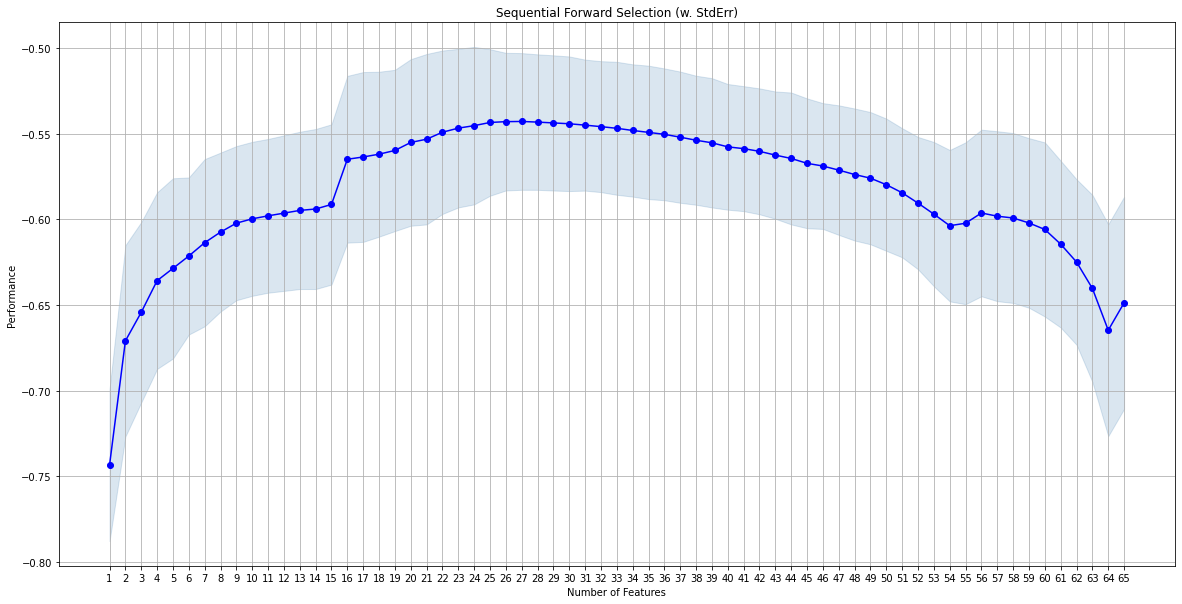

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs = sfs(LinearRegression(), 
          k_features=65, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

fig.set_size_inches(20, 10)

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

cv = 10

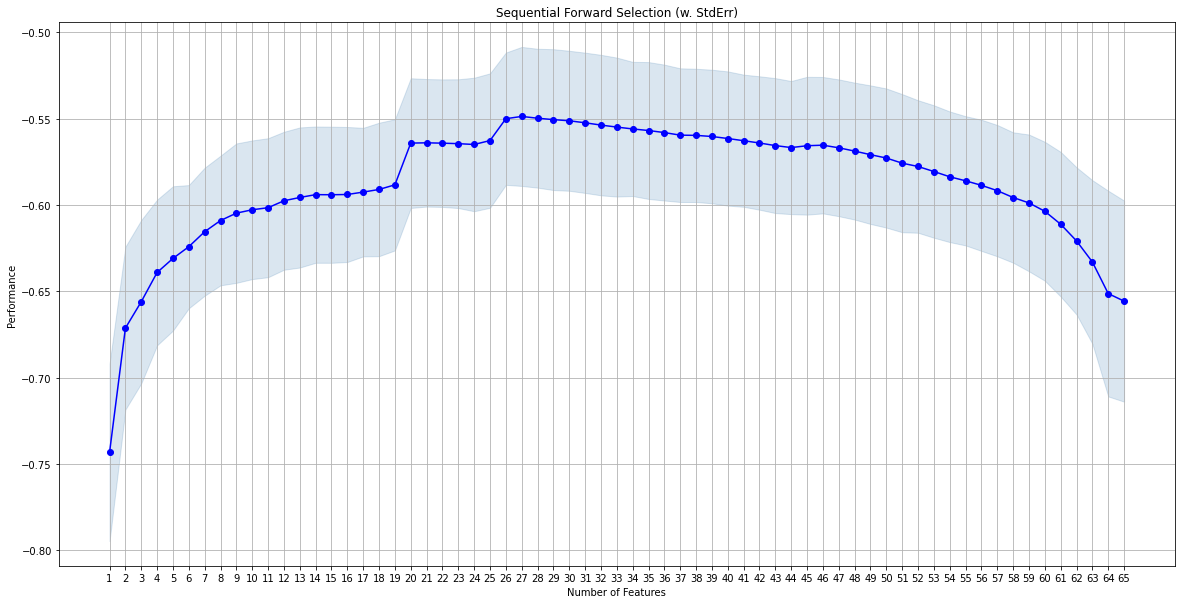

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
sfs = sfs(LinearRegression(), 
          k_features=65, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X_train, y_train)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

fig.set_size_inches(20, 10)

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

####k = 25 ####

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=25, forward=True, verbose=2, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(X_train, y_train)

df_SFS_results = pd.DataFrame(sfs1.subsets_).transpose()
df_SFS_results

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished

[2022-02-26 18:04:43] Features: 1/25 -- score: -0.7434796089275304[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  64 out of  64 | elapsed:    0.6s finished

[2022-02-26 18:04:43] Features: 2/25 -- score: -0.6709365926240572[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  63 out of  63 | elapsed:    0.6s finished

[2022-02-26 18:04:44] Features: 3/25 -- score: -0.6542381153503867[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

,feature_idx,cv_scores,avg_score,feature_names
1,"(3,)","[-0.7906101639363003, -0.8472678140174122, -0....",-0.74348,"(Poverty,)"
2,"(3, 6)","[-0.7670400942819541, -0.7544278085250128, -0....",-0.670937,"(Poverty, Pop_Density)"
3,"(3, 5, 6)","[-0.747054554041772, -0.7405517983599583, -0.4...",-0.654238,"(Poverty, Female, Pop_Density)"
4,"(1, 3, 5, 6)","[-0.701814363579582, -0.7335720994890433, -0.4...",-0.635772,"(Savings, Poverty, Female, Pop_Density)"
5,"(1, 3, 5, 6, 34)","[-0.701857028924407, -0.7308054525531678, -0.4...",-0.628603,"(Savings, Poverty, Female, Pop_Density, interAN)"
6,"(1, 3, 5, 6, 34, 52)","[-0.6968408107102162, -0.6884164753019171, -0....",-0.621374,"(Savings, Poverty, Female, Pop_Density, interA..."
7,"(1, 3, 4, 5, 6, 34, 52)","[-0.6947451016483305, -0.6822099399811549, -0....",-0.613598,"(Savings, Poverty, Veterans, Female, Pop_Densi..."
8,"(1, 3, 4, 5, 6, 34, 47, 52)","[-0.6995020587990775, -0.672188565231424, -0.4...",-0.607404,"(Savings, Poverty, Veterans, Female, Pop_Densi..."
9,"(1, 3, 4, 5, 6, 15, 34, 47, 52)","[-0.6924483912513311, -0.6814456685777021, -0....",-0.602184,"(Savings, Poverty, Veterans, Female, Pop_Densi..."
10,"(1, 3, 4, 5, 6, 15, 22, 34, 47, 52)","[-0.6894832450087067, -0.6707436671748208, -0....",-0.599663,"(Savings, Poverty, Veterans, Female, Pop_Densi..."


In [ ]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['Savings', 'Poverty', 'Veterans', 'Female', 'Pop_Density', 'dem', 'savings_sq', 'poverty_sq', 'female_sq', 'nursing_sq', 'dem_sq', 'interVI', 'interVF', 'interAI', 'interAN', 'interSN', 'interIF', 'interIN', 'interPN', 'interPD', 'interFPD', 'interFN', 'interPDC', 'interPDD', 'interND']


##Fitting the model ##

In [ ]:
new_data = model_data[feat_names]
new_data.head()
# new_data.shape

,Savings,Poverty,Veterans,Female,Pop_Density,dem,savings_sq,poverty_sq,female_sq,nursing_sq,dem_sq,interVI,interVF,interAI,interAN,interSN,interIF,interIN,interPN,interPD,interFPD,interFN,interPDC,interPDD,interND
0,-1.061970,4.317065,-0.758474,-1.293308,-0.156445,2,1.127780,18.637048,1.672646,1.986378,4,1.614200,0.980941,0.165192,-0.109397,-1.496729,2.752445,-2.999491,6.084425,8.634129,0.202332,-1.822775,-13.767170,-0.312890,2.818779
1,-1.115632,-0.828199,-0.111146,-0.006331,0.047506,2,1.244635,0.685913,0.000040,0.816646,4,0.001569,0.000704,0.017803,1.139785,1.008180,0.000089,0.012756,0.748430,-1.656397,-0.000301,0.005721,13.064275,0.095013,-1.807369
2,-0.457208,0.824609,0.258104,1.258955,-0.145739,1,0.209039,0.679981,1.584969,0.108741,1,-0.182788,0.324941,-0.120478,0.056099,-0.150769,-0.891586,-0.233534,0.271923,0.824609,-0.183478,0.415152,-64.416462,-0.145739,0.329760
3,-0.436083,0.465303,0.039289,-0.873956,-0.092131,0,0.190168,0.216507,0.763800,0.248226,0,-0.038615,-0.034337,0.049234,-0.024958,-0.217266,0.858970,-0.489680,0.231825,0.000000,0.080518,-0.435425,-16.952035,-0.000000,0.000000
4,-0.664350,-0.052097,-1.724907,0.311798,-0.064610,2,0.441361,0.002714,0.097218,0.127647,4,0.831046,-0.537823,0.554618,0.411283,0.237357,-0.150222,0.172134,0.018613,-0.104195,-0.020145,-0.111398,-29.785376,-0.129221,-0.714555


In [ ]:
y_data_new = model_data['CLINTON']
X_data_new = model_data[feat_names]

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_data_new, y_data_new, test_size=0.33, random_state=1)

In [ ]:
X_data_new.shape

print("number of test samples :", X_test_new.shape[0])
print("number of training samples:",X_train_new.shape[0])


number of test samples : 314
number of training samples: 635


In [ ]:
# Fitting Multiple Linear Regression to the Training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_new, y_train_new)

LinearRegression()

In [ ]:
print("score: ",regressor.score(X_train_new, y_train_new))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.4751980399574459
Model slope:     [-2.99603318e-01  6.21229863e-01  1.17004700e-01  3.37343245e-01
 -8.42013618e-02  1.50097532e+00  4.30380276e-02 -1.38642224e-03
  4.56745921e-02  2.16541870e-02 -6.86008491e-01  1.12194469e-01
  7.12635469e-03 -1.07615738e-01 -5.42855638e-02  9.76165014e-03
  8.06944409e-02 -1.82723478e-01 -1.25984424e-01 -1.26412206e-01
  3.13710276e-02 -8.90397264e-02 -2.70628218e-05  1.43887330e-01
 -2.00011679e-02]
Model intercept: -0.3842875051890046


In [ ]:
pd. DataFrame(zip(X_data_new.columns, regressor.coef_), columns = ['features', 'estimatedCoefficients'])



,features,estimatedCoefficients
0,Savings,-0.299603
1,Poverty,0.621230
2,Veterans,0.117005
3,Female,0.337343
4,Pop_Density,-0.084201
5,dem,1.500975
6,savings_sq,0.043038
7,poverty_sq,-0.001386
8,female_sq,0.045675
9,nursing_sq,0.021654


In [ ]:
# Predicting the Test set results

y_pred = regressor.predict(X_test_new)

print("score: ",regressor.score(X_test_new, y_test_new))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.3924509401855404
Model slope:     [-2.99603318e-01  6.21229863e-01  1.17004700e-01  3.37343245e-01
 -8.42013618e-02  1.50097532e+00  4.30380276e-02 -1.38642224e-03
  4.56745921e-02  2.16541870e-02 -6.86008491e-01  1.12194469e-01
  7.12635469e-03 -1.07615738e-01 -5.42855638e-02  9.76165014e-03
  8.06944409e-02 -1.82723478e-01 -1.25984424e-01 -1.26412206e-01
  3.13710276e-02 -8.90397264e-02 -2.70628218e-05  1.43887330e-01
 -2.00011679e-02]
Model intercept: -0.3842875051890046


##Model Diagnostics##

Text(0.5, 1.0, 'Test Data for CLINTON vs Predicted CLINTON: $Y_i$ vs $\\hat{Y}_i$')

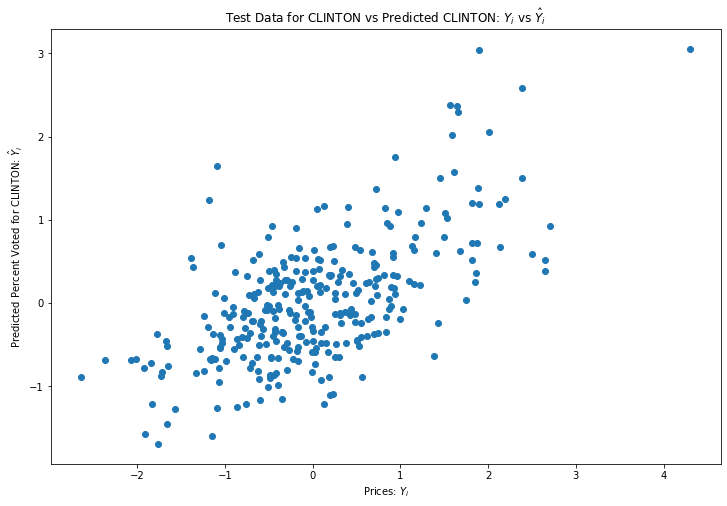

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(y_test_new, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel ("Predicted Percent Voted for CLINTON: $\hat{Y}_i$")
plt.title("Test Data for CLINTON vs Predicted CLINTON: $Y_i$ vs $\hat{Y}_i$")

There is a positive linear relationship

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_new, y_pred)

print('Mean Squared Error: ', mse)

Mean Squared Error:  0.6003856504046307


Residula Plots

Text(0, 0.5, 'Residuals')

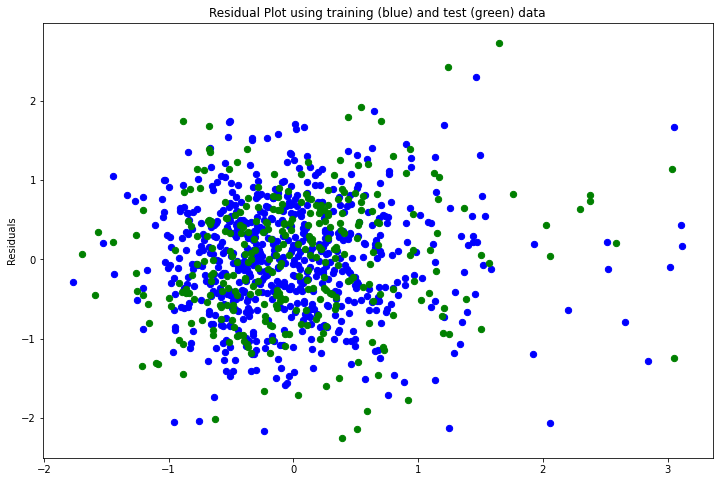

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(regressor.predict(X_train_new), regressor.predict(X_train_new) - y_train_new, c='b', s=40, alpha=1.0)
plt.scatter(regressor.predict(X_test_new), regressor.predict(X_test_new) - y_test_new, c='g', s=40)
# plt.hlines (y = 0, xmin=0)

plt.title ('Residual Plot using training (blue) and test (green) data')
plt.ylabel ('Residuals')

There appears to be a constant variance of errors

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


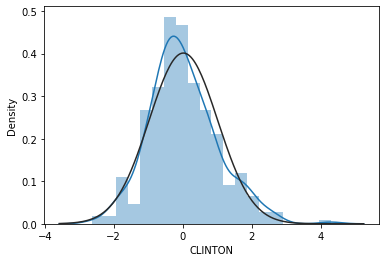

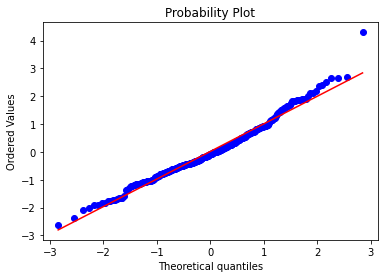

In [ ]:
from scipy import stats
from scipy.stats import norm

sns.distplot(y_test_new, fit = norm)
fig = plt.figure()
res = stats.probplot(y_test_new, plot = plt)

##Model Reliability##

In [ ]:
from scipy.stats import pearsonr

In [ ]:
rSquare_train = regressor.score(X_train_new, y_train_new)
rSquare_train

0.4751980399574459

In [ ]:
rsquare_test = regressor.score(X_test_new, y_test_new)
rsquare_test

0.3924509401855404

In [ ]:
corr = pearsonr(y_test_new, y_pred)
r = corr[0]
pvalue = corr[1]
r, pvalue

(0.6358812774773548, 5.601599235517803e-37)

In [ ]:
model_rel = rSquare_train - r**2
model_rel

0.07085304091121325

The shrinkage factor is in-line with the commonly accepted threshold of a good model (0 to .10).